<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Уберём столбцы, которые нам не понадобятся

In [4]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#Приведение столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [8]:
#Проверка дупликатов
df.duplicated().sum()

0

In [9]:
df.isna().sum()

creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [10]:
#Доля объектов положительного класса:
sum(df["exited"]/len(df))

0.20369999999999389

In [11]:
#Доля объектов отрицательного класса:
1 - sum(df["exited"]/len(df))

0.7963000000000061

In [12]:
#Преобразуем категориальные признаки в численные
gender_one_hot = pd.get_dummies(df["gender"], drop_first=True)
country_one_hot = pd.get_dummies(df["geography"], drop_first=True)
df.drop(["gender", "geography"], axis=1, inplace=True)
df_one_hot = pd.concat([df, gender_one_hot, country_one_hot], axis=1)

### Вывод
- Пропущенные значения в столбце tenure
- Типы столбцов в порядке
- Дубликатов нет
- Объектов отрицательного класса намного больше, соотношение 1 к 4

Пропуски в столбце Tenure — сколько лет человек является клиентом банка

## Исследование задачи

In [14]:
#Разделим объекты и целевой признак
features = df.drop("exited", axis=1)
target = df["exited"]

In [15]:
#Заполним пропуски
features.fillna(-1, inplace=True)
features['tenure'] = features['tenure'].astype('object')

In [16]:
#Применим OHE для столбца tenure
tenure_one_hot = pd.get_dummies(df["tenure"], drop_first=True)
df = df.drop('tenure',axis = 1)
df = df.join(tenure_one_hot)
df

,creditscore,age,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,619,42,0.00,1,1,1,101348.88,1,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,1,0,96270.64,0,0,0,0,0,1,0,0,0,0,0
9996,516,35,57369.61,1,1,1,101699.77,0,0,0,0,0,0,0,0,0,0,1
9997,709,36,0.00,1,0,1,42085.58,1,0,0,0,0,0,0,1,0,0,0
9998,772,42,75075.31,2,1,0,92888.52,1,0,0,1,0,0,0,0,0,0,0


Т.к. у нас один датасет, то делить его будем на 3 части: обучаемая(60%), валидационная (20%) и тестовая (20%)

In [17]:
#Отделение тестовой части
x, features_test, y, target_test = train_test_split(features, target, test_size=0.2, train_size=0.8)

In [18]:
#Отделения валидационной и обучающей выборки
features_train, features_valid, target_train, target_valid = train_test_split(x, y, test_size = 0.25, train_size =0.75)

In [19]:
#Скалирование
scaler = StandardScaler()
scaler.fit(features_train) 
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid)
features_test_scaled = scaler.transform(features_test)

In [20]:
#Преобразуем nparray в dataframe
def nptodf(data, ind, column):
    frame = pd.DataFrame(data, index = ind.index, columns = column.columns)
    return frame
features_train_scaled = nptodf(features_train_scaled, target_train, features)
features_valid_scaled = nptodf(features_valid_scaled, target_valid, features)
features_test_scaled = nptodf(features_test_scaled, target_test, features)

In [21]:
#Проверка разделения
def check(data):
    res = len(data)/len(df)
    print('Процент выборки:', res, ', Количество строк и столбцов:', data.shape)
    
data_list = [features_train_scaled, features_valid_scaled, target_train, target_valid, features_test_scaled, target_test]
for i in data_list:
    check(i)

Процент выборки: 0.6 , Количество строк и столбцов: (6000, 8)
Процент выборки: 0.2 , Количество строк и столбцов: (2000, 8)
Процент выборки: 0.6 , Количество строк и столбцов: (6000,)
Процент выборки: 0.2 , Количество строк и столбцов: (2000,)
Процент выборки: 0.2 , Количество строк и столбцов: (2000, 8)
Процент выборки: 0.2 , Количество строк и столбцов: (2000,)


### Дерево решений

In [22]:
best_model_dt = None
best_model_dt_depth = 0
best_model_dt_leaf = 0
best_result_dt = 0
for depth in range(1, 13):
    for i in range(1, 50):
       
            model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth, min_samples_leaf = i) 
            model_dt.fit(features_train_scaled, target_train) 
            predictions_dt = model_dt.predict(features_valid_scaled) 
            result_dt = accuracy_score(target_valid, predictions_dt)
            if result_dt > best_result_dt:
                best_model_dt = model_dt
                best_model_dt_depth = depth
                best_model_dt_leaf = i
                best_result_dt = result_dt
result_f1_dt = f1_score(target_valid, predictions_dt)
print('F1 мера дерево решений:', result_f1_dt)
print("Лучший результат:", best_result_dt, end='') 
print(" Гиперпараметры:", "max_depth:", best_model_dt_depth, ", min_samples_leaf:", best_model_dt_leaf)

F1 мера дерево решений: 0.49541284403669733
Лучший результат: 0.8555 Гиперпараметры: max_depth: 5 , min_samples_leaf: 3


### Случайный лес

In [23]:
best_model_rf = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
for est in range(1, 60):
    for dpth in range(1, 30):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = dpth) 
        model_rf.fit(features_train_scaled, target_train) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_rf = model_rf.score(features_valid_scaled, target_valid)
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
result_f1_rf = f1_score(target_valid, predictions_rf)
print('F1 мера случайный лес:', result_f1_rf)
print("Лучший результат:", best_result_rf, end='') 
print(" Гиперпараметры:", "n_estimators:", best_model_rf_est, ", max_depth:", best_model_rf_depth)

F1 мера случайный лес: 0.5398773006134969
Лучший результат: 0.858 Гиперпараметры: n_estimators: 21 , max_depth: 11


### Логистическая регрессия

In [24]:
best_model_lg = None
best_model_lg_it = 0
best_result_lg = 0
for it in range(100, 10000, 100):
    model_lg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter = it) 
    model_lg.fit(features_train_scaled, target_train) 
    predictions_lg = model_lg.predict(features_valid_scaled) 
    result_lg = model_lg.score(features_valid_scaled, target_valid)
    if result_lg > best_result_lg:
        best_model_lg = model_lg
        best_result_lg = result_lg
        best_model_lg_it = it
result_f1_lg = f1_score(target_valid, predictions_lg)
print('F1 мера логистическая регрессия:', result_f1_lg)
print("Лучший результат:", best_result_lg, end='') 
print(" Гиперпараметры:", "n_estimators:", best_model_lg_it)

F1 мера логистическая регрессия: 0.2608695652173913
Лучший результат: 0.8045 Гиперпараметры: n_estimators: 100


### Вывод

- Лучший результат по точности и f1-мере у случайного леса

## Борьба с дисбалансом

Так как лучшие результаты показала модель случайного леса, будем работать с ней

### Upsampling

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [26]:
features_upsampled, target_upsampled = upsample(features_train_scaled, target_train, 4)

In [27]:
best_model_rf_up = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
for est in range(1, 40):
    for dpth in range(1, 15):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = dpth) 
        model_rf.fit(features_upsampled, target_upsampled) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_f1_rf = f1_score(target_valid, predictions_rf)
        if result_f1_rf > best_result_rf:
            best_model_rf_up = model_rf
            best_result_rf = result_f1_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
result_rf = model_rf.score(features_valid_scaled, target_valid)
print('F1 мера случайный лес:', best_result_rf)
print("Лучший результат:", result_rf, end='') 
print(" Гиперпараметры:", "n_estimators:", best_model_rf_est, ", max_depth:", best_model_rf_depth)

F1 мера случайный лес: 0.5939933259176864
Лучший результат: 0.815 Гиперпараметры: n_estimators: 39 , max_depth: 11


### Downsampling

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [30]:
features_downsampled_train, target_downsampled_train = downsample(features_train_scaled, target_train, fraction=0.5)

In [31]:
best_model_rf_down = None
best_model_rf_est = 0
best_model_rf_depth = 0
best_result_rf = 0
for est in range(1, 40):
    for dpth in range(1, 15):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = dpth) 
        model_rf.fit(features_downsampled_train, target_downsampled_train) 
        predictions_rf = model_rf.predict(features_valid_scaled) 
        result_f1_rf = f1_score(target_valid, predictions_rf)
        if result_f1_rf > best_result_rf:
            best_model_rf_down = model_rf
            best_result_rf = result_f1_rf
            best_model_rf_est = est
            best_model_rf_depth = dpth
result_rf = model_rf.score(features_valid_scaled, target_valid)
print('F1 мера случайный лес:', best_result_rf)
print("Лучший результат:", result_rf, end='') 
print(" Гиперпараметры:", "n_estimators:", best_model_rf_est, ", max_depth:", best_model_rf_depth)

F1 мера случайный лес: 0.5958005249343833
Лучший результат: 0.828 Гиперпараметры: n_estimators: 34 , max_depth: 9


In [32]:
def roc(model): 
    probabilities_valid = model.predict_proba(features_valid_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show() 
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print(auc_roc)

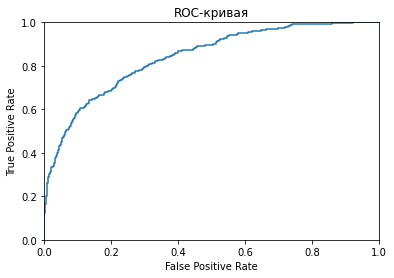

0.8398023640302535


In [33]:
roc(best_model_rf_up)

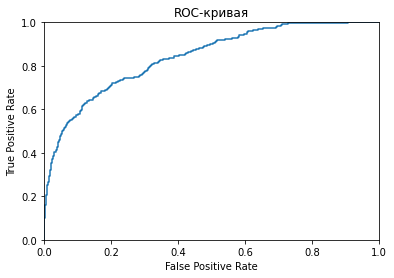

0.8403587852989243


In [34]:
roc(best_model_rf_down)

### Вывод

- Модель случайного леса до борьбы с дисбалансом показывала результат метрики f1 - 54%.
- Произвели upsampling положительного класса, благодаря чему удалось повысить f1 меру до 60.9%. Dowmsampling до 60%.

## Тестирование модели

In [35]:
predictions = best_model_rf_up.predict(features_test_scaled)
print("Accuracy:", accuracy_score(target_test, predictions))
print("F1:", f1_score(predictions, target_test))

Accuracy: 0.827
F1: 0.5967365967365967


In [36]:
predictions = best_model_rf_down.predict(features_test_scaled)
print("Accuracy:", accuracy_score(target_test, predictions))
print("F1:", f1_score(predictions, target_test))

Accuracy: 0.842
F1: 0.5694822888283378


In [37]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(features_train_scaled, target_train)
DummyClassifier(random_state=0, strategy='most_frequent')
score = clf.score(features_test_scaled, target_test)
print('Точность Dummy:', score)

Точность Dummy: 0.802


### Вывод

- Нами был проведен первичный анализ данных, выявлен явный дисбаланс классов, отрицательного к положительному - 4 к 1.
- Произвели предобработку данных, заполнили пропуски модой, прошкалировали количественные переменные, сделали One_hot_encoding. 
- Модель случайного леса до борьбы с дисбалансом показывала результат метрики f1 - 53.98%.
- Произвели upsampling положительного класса, благодаря чему удалось повысить f1 меру до 59.39%. Dowmsampling до 56.94%.
- Проверка на тестовой выборке подтверждает, что upsampling помог справиться с дисбалансом классов и удалось увеличить метрику f1 до 59.67%.